In [153]:
##Load modules and libraries
import numpy as np
import os.path
import string
import matplotlib
import matplotlib.pyplot as plt
from scipy import spatial
import copy

# Function to generate Item memory for symbols

In [154]:
def makeItemMemory(dimension):
    alphabet = list(string.ascii_lowercase+' ') # set of used symbols 
    HDdic = {}
    for symb in alphabet:
        HDdic[symb] = 2*np.random.randint(low=0, high=2, size=dimension)-1 # assign a random bipolar HD vector 
    return HDdic

# Parameters 

In [155]:
langLabels = ['pol', 'ces', 'slk', 'slv', 'bul', 'ron', 'ita',  'por',    'spa',   'fra', 'eng', 'deu',  'nld', 'dan', 'swe', 'fin', 'hun', 'est', 'lav', 'lit', 'ell'] # Names of training files for different languages 
langFull = ['Polish', 'Czech', 'Slovak', 'Slovene','Bulgarian', 'Romanian', 'Italian',  'Portuguese',   'Spanish',   'French', 'English', 'German', 'Dutch', 'Danish', 'Swedish', 'Finnish', 'Hungarian', 'Estonian', 'Latvian', 'Lithuanian',   'Greek'] # Full names of languages 

dimension = 1024 # Dimensionality for high-dimensional vectors
n=3 # size of n-gram

dataSizeLimit=100000 # number symbols to consider for each language. If set to 0 then take full dataset

# Initialize profile vectors 

In [156]:
def initProfiles(dimension,langLabels):    
    HDProfiles = {}
    for lang in langLabels:
        HDProfiles[lang] = np.zeros(dimension) # initialize profile vectors
    return HDProfiles

# Function to form an HD vector for a given n-gram 

In [157]:
def makengramHD(seq,HDdic, dimension):
    n=len(seq)
    # HDgram=np.ones(dimension) # initialize n-gram's HD vector to all ones  
    
    #ToDo use binding and permutation operations to create n-gram's HD vector
    HDgram = np.prod(np.array([np.roll(HDdic.get(seq[i]), n-i-1) for i in np.arange(n)]), axis=0)
    return HDgram

# Construct HD vectors representing n-gram statistics for each language 

In [158]:
def makeDicAndProfiles(dimension, langLabels):
    HDdic=makeItemMemory(dimension) # make item memory for the set of used symbols (26 letters  + space)
    HDProfiles=initProfiles(dimension,langLabels) # initialize profile HD vectors
    return HDdic, HDProfiles
    
def populateProfiles(HDdic, HDProfiles, langLabels, dimension, n, dataSizeLimit):
    #For each language
    for lang in langLabels:
        # print (lang)
        data_file_name=os.path.abspath(os.path.join('training_texts', lang +'.txt')) # get training data

        with open(data_file_name, 'r') as f:
            langdData = f.read() # read file
        f.close()  

        # if training data should be trimmed
        if dataSizeLimit>0 and len(langdData)>dataSizeLimit: 
            langdData=langdData[0:dataSizeLimit]

        #Construct profile HD vectors
        for i in range(0,len(langdData)-n+1):
            seq=langdData[i:i+n] # pick the current n-gram
            HDgram=makengramHD(seq,HDdic, dimension) # get n-gram's HD vector
            HDProfiles[lang] += HDgram # update profile HD vector
    return HDProfiles

# Compute cosine similarities between profile HD vectors

In [163]:
def getCosSim(HDProfiles, langLabels, langFull):
    Languages=[] # full names of the lanuages in the right order
    keys=list(HDProfiles.keys()) # order of lanuages in the dictionary
    for key in keys:
        ind=langLabels.index(key)
        Languages.append(langFull[ind])

    # Get profiles HD vector into an array
    profiles=np.array(list(HDProfiles.values()))

    #ToDo calculate cosine similarity between HD vectors in "profiles"
    cos_sim = []
    for i in np.arange(profiles.shape[0]):
        cos_sim.append([])
        for j in np.arange(profiles.shape[0]):
            sim = np.dot(profiles[i], profiles[j]) / (np.linalg.norm(profiles[i]) * np.linalg.norm(profiles[j]))
            cos_sim[i].append(sim)
    cos_sim = np.array(cos_sim)
    return cos_sim

# Visualize cosine similarities

In [164]:
def visualizeCosSim(cos_sim, langLabels, title):
    plt.rcParams.update({'font.size': 9})

    fig, ax = plt.subplots(dpi=300)
    im = ax.imshow(cos_sim, cmap='inferno',vmin=0, vmax=1)

    #ToDo visualize cosine similarity between language profiles
    ax.set_xticks(np.arange(len(cos_sim)))
    ax.set_yticks(np.arange(len(cos_sim)))
    ax.set_xticklabels(langLabels)
    ax.set_yticklabels(langLabels)
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')

    ax.set_title(title)
    fig.tight_layout()
    plt.show()
    
    return ax

# Question 1

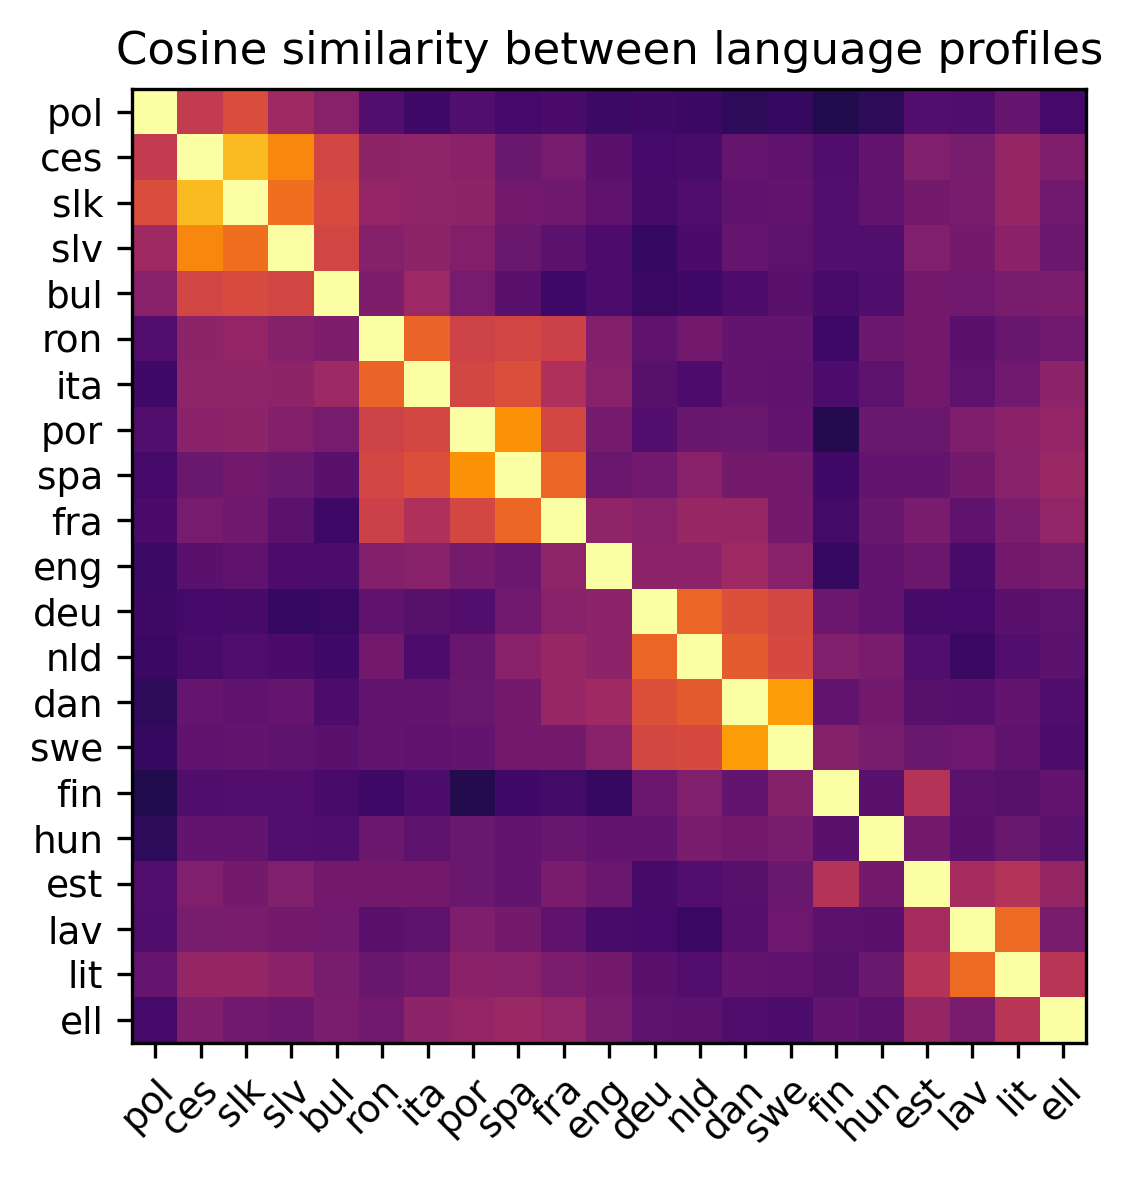

<AxesSubplot:title={'center':'Cosine similarity between language profiles'}>

In [165]:
dimension = 1024 # Dimensionality for high-dimensional vectors
n = 3
dataSizeLimit=30000
Q1Dic, Q1Profile = makeDicAndProfiles(dimension, langLabels)
Q1Profile = populateProfiles(Q1Dic, Q1Profile, langLabels, dimension, n, dataSizeLimit)
q1_cos_sim = getCosSim(Q1Profile, langLabels, langFull)
visualizeCosSim(q1_cos_sim, langLabels, "Cosine similarity between language profiles")

The results are qualitatively similar to Figure 1 in "Language Geometry Using Random Indexing". There is a distinction that at least 4 clusters of similar languages exist, and that those similar languages looselyfollow the classes of language root. Theer are also subleties that are shown, such that within the {fin, hun, est, lav, lit, ell} group, {fin, hun, est} and {lav, lit, ell} are more similar within each group, which is also implied by Figure 1 in "Language Geometry Using Random Indexing"

# Question 2

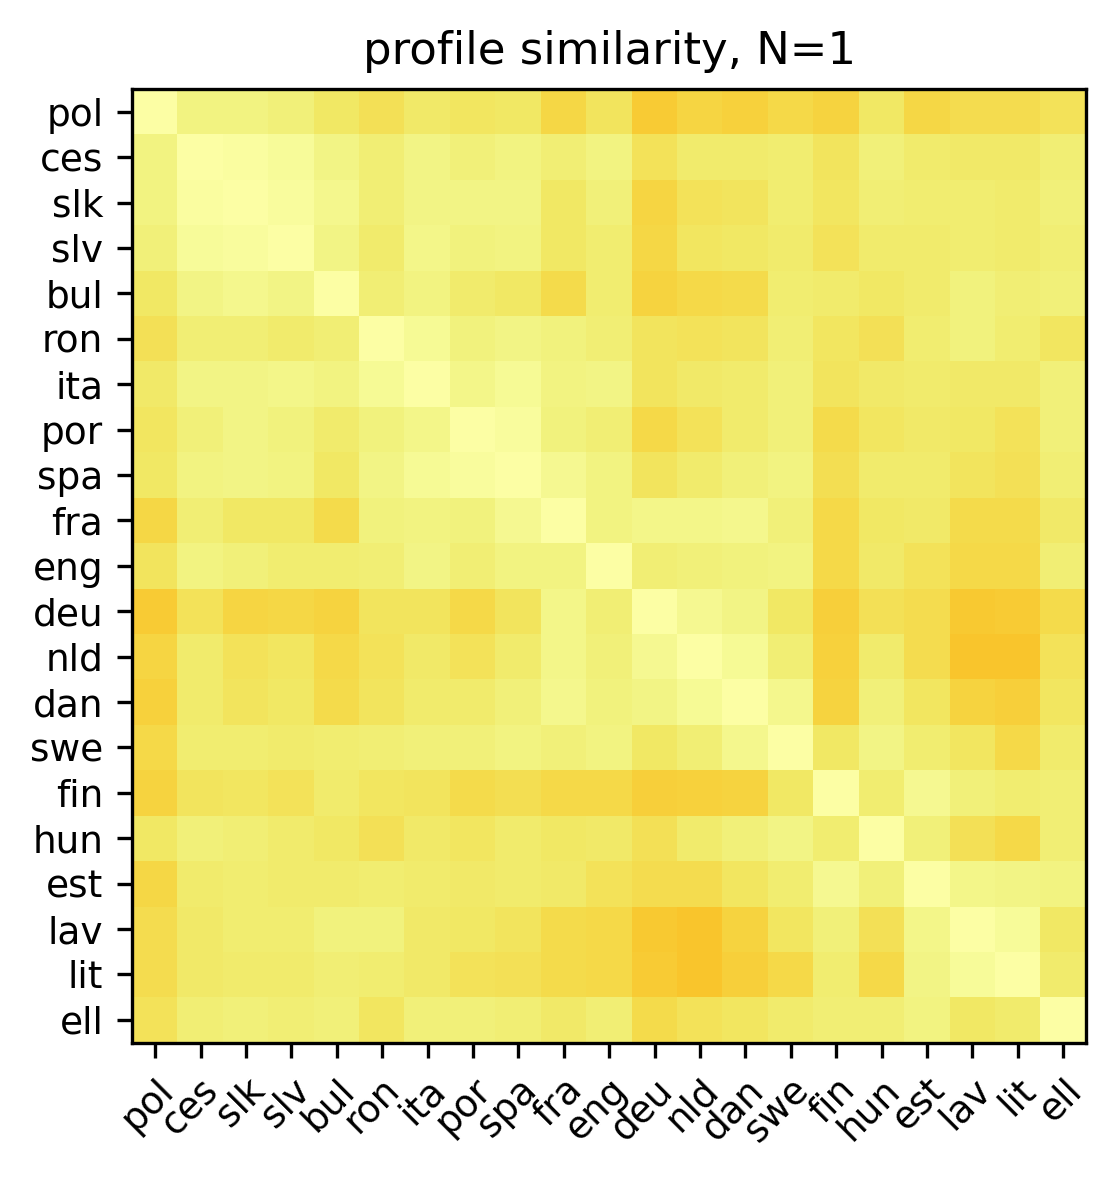

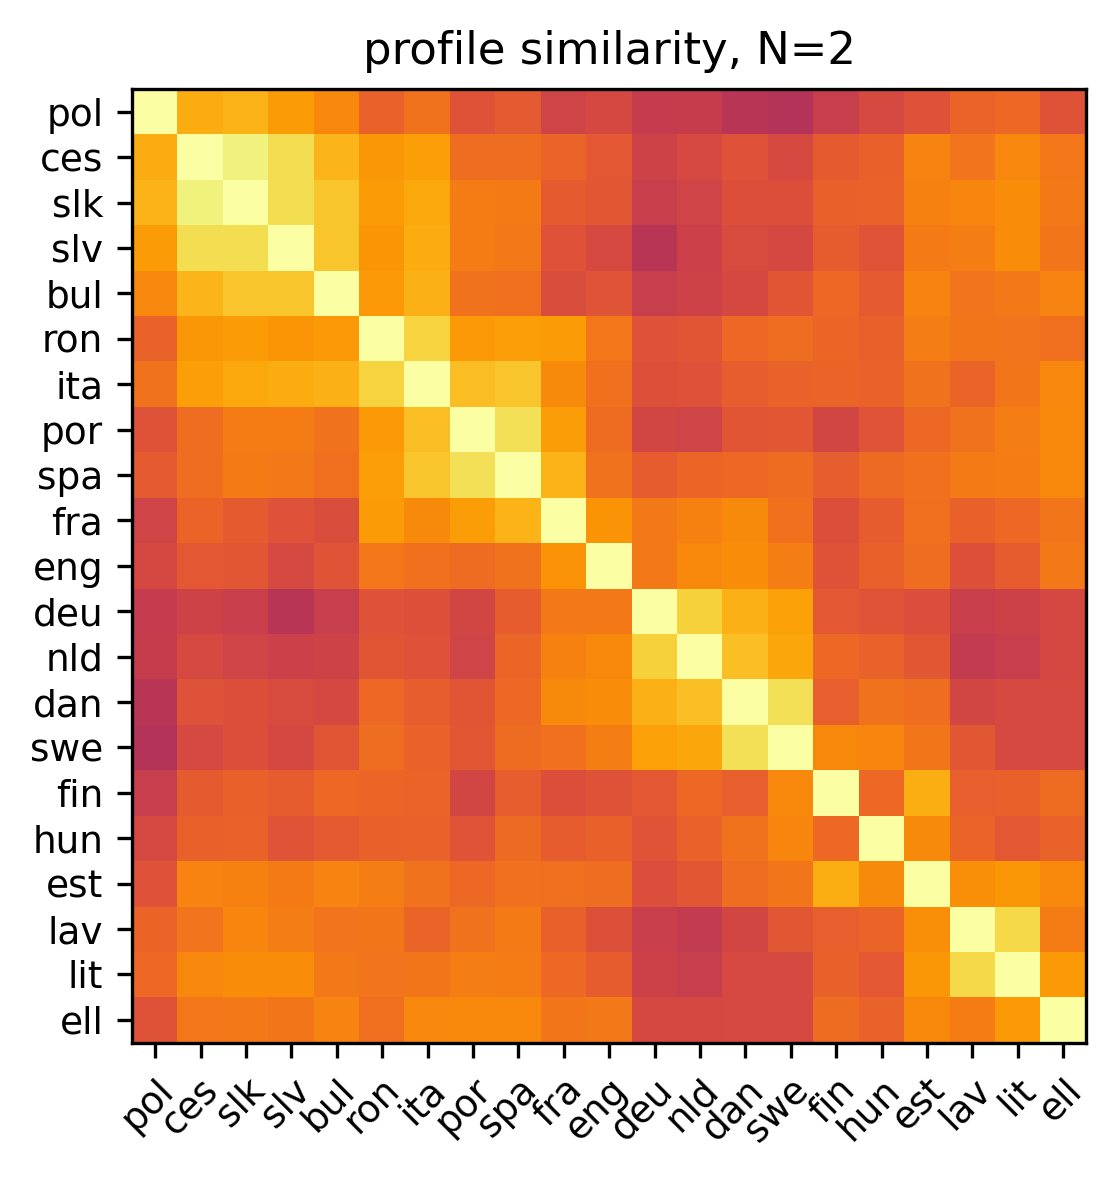

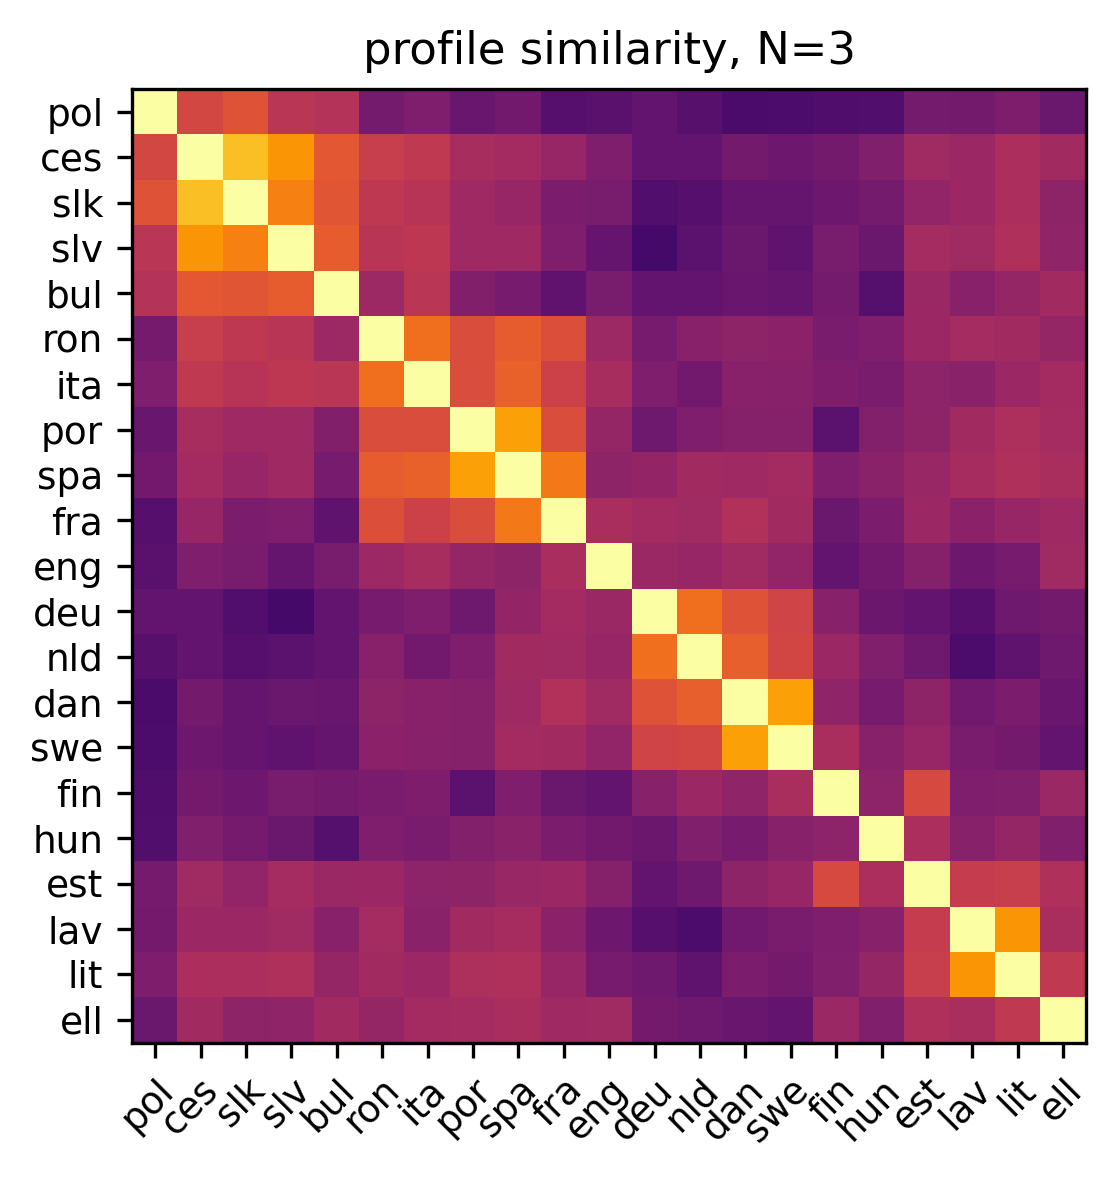

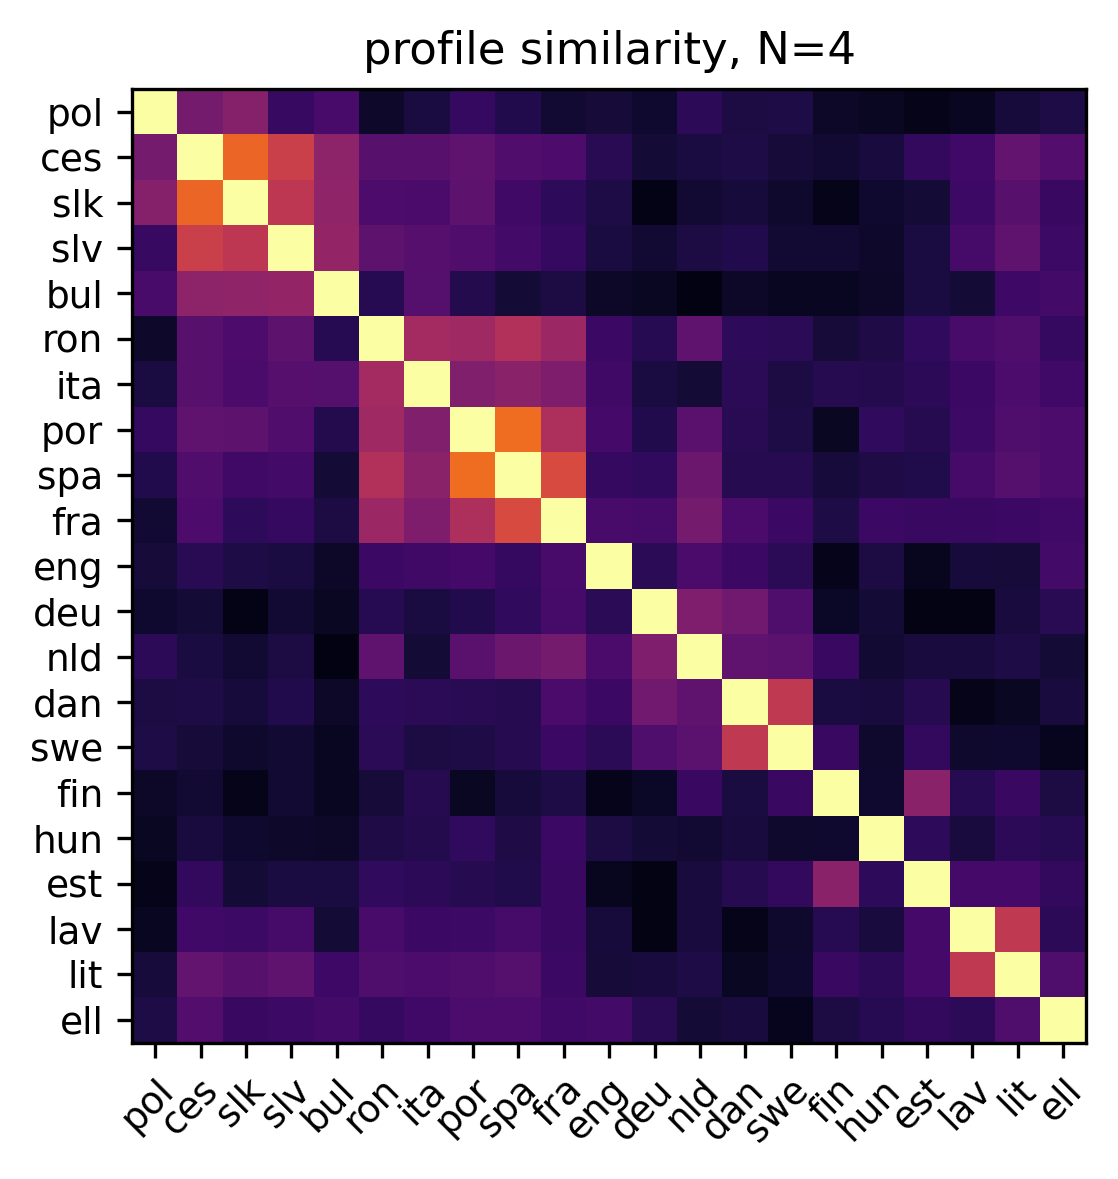

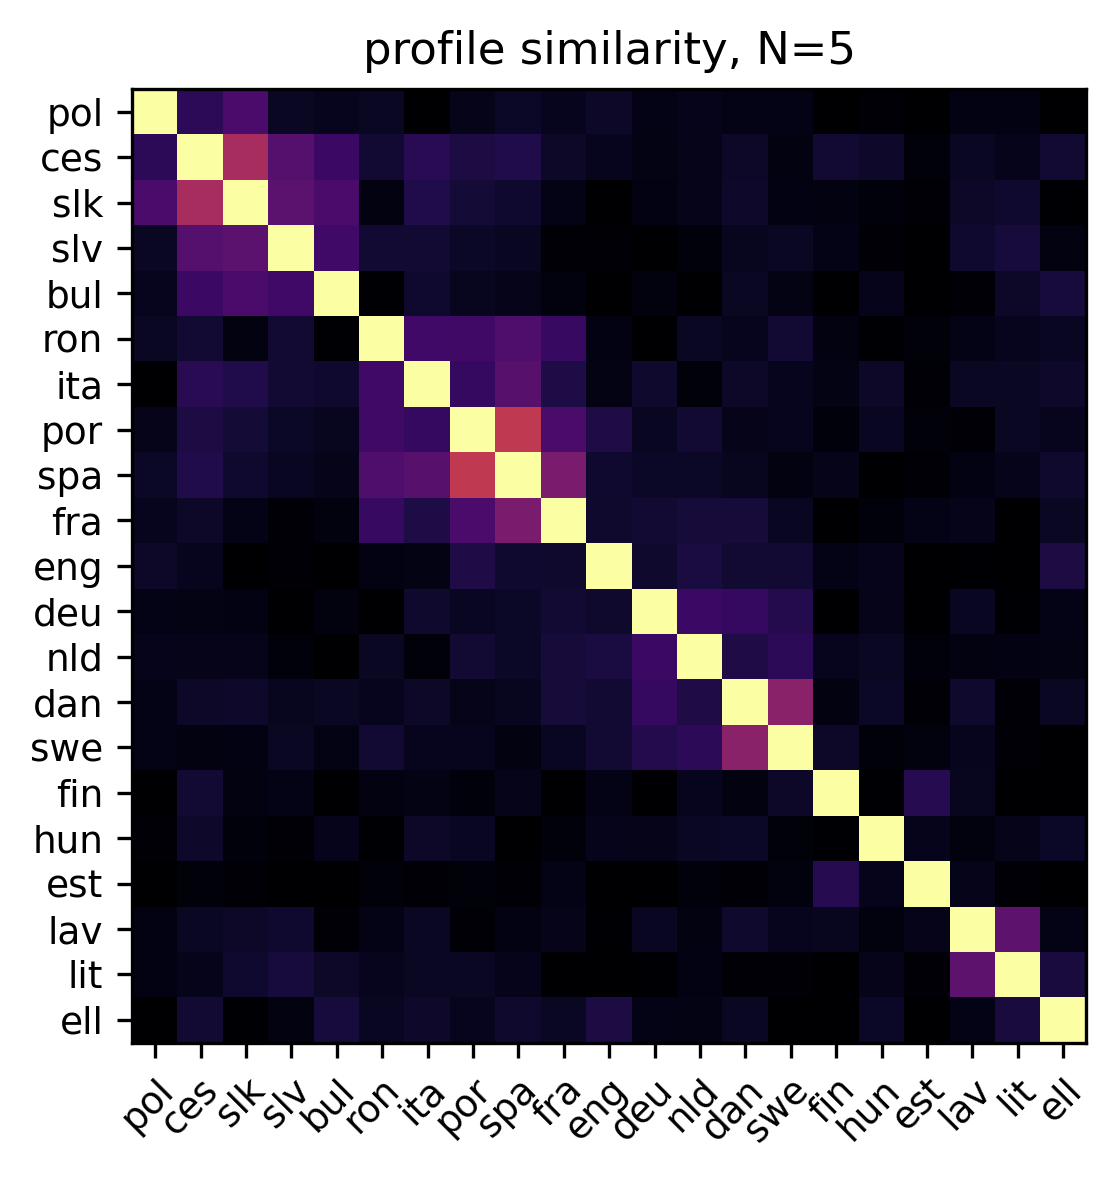

In [166]:
dimension = 1024 # Dimensionality for high-dimensional vectors
dataSizeLimit=30000
Q2Dic, Q2ProfileInit = makeDicAndProfiles(dimension, langLabels)
for n in [1,2,3,4,5]:
    Q2Profile = copy.deepcopy(Q2ProfileInit)
    Q2Profile = populateProfiles(Q2Dic, Q2Profile, langLabels, dimension, n, dataSizeLimit)
    q2_cos_sim = getCosSim(Q2Profile, langLabels, langFull)
    q2_ax = visualizeCosSim(q2_cos_sim, langLabels, f"profile similarity, N={n}")

With a low $n$, the profile vectors become too similar. On the other hand, with a high $n$, the profile vectors becoome too dissimilar. The optimal value is $n=3$, which implies that most semantic information in each language lies in 3 letter sequences.

# Question 3

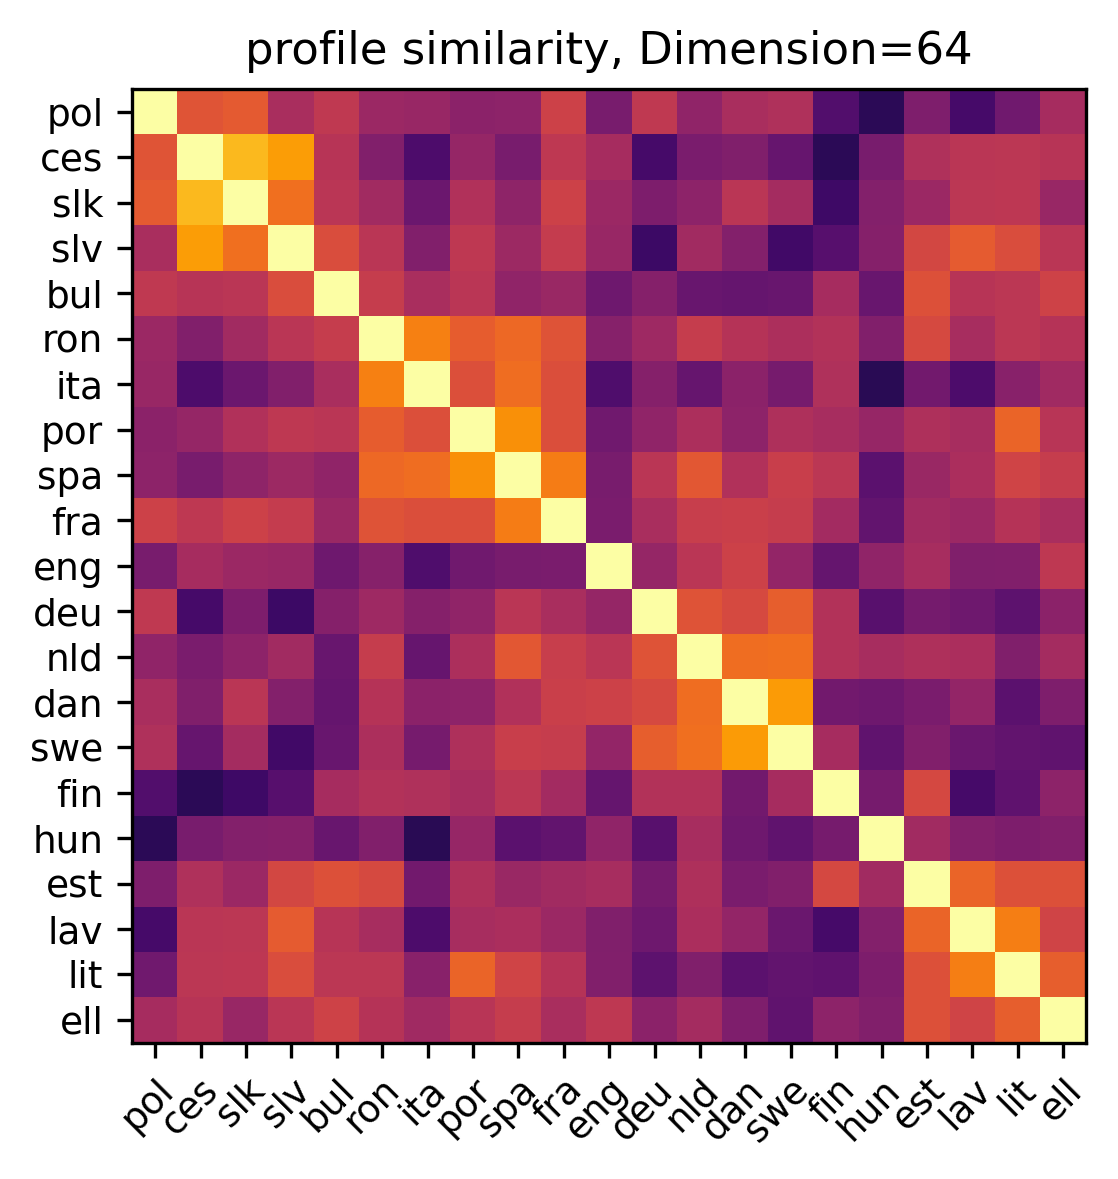

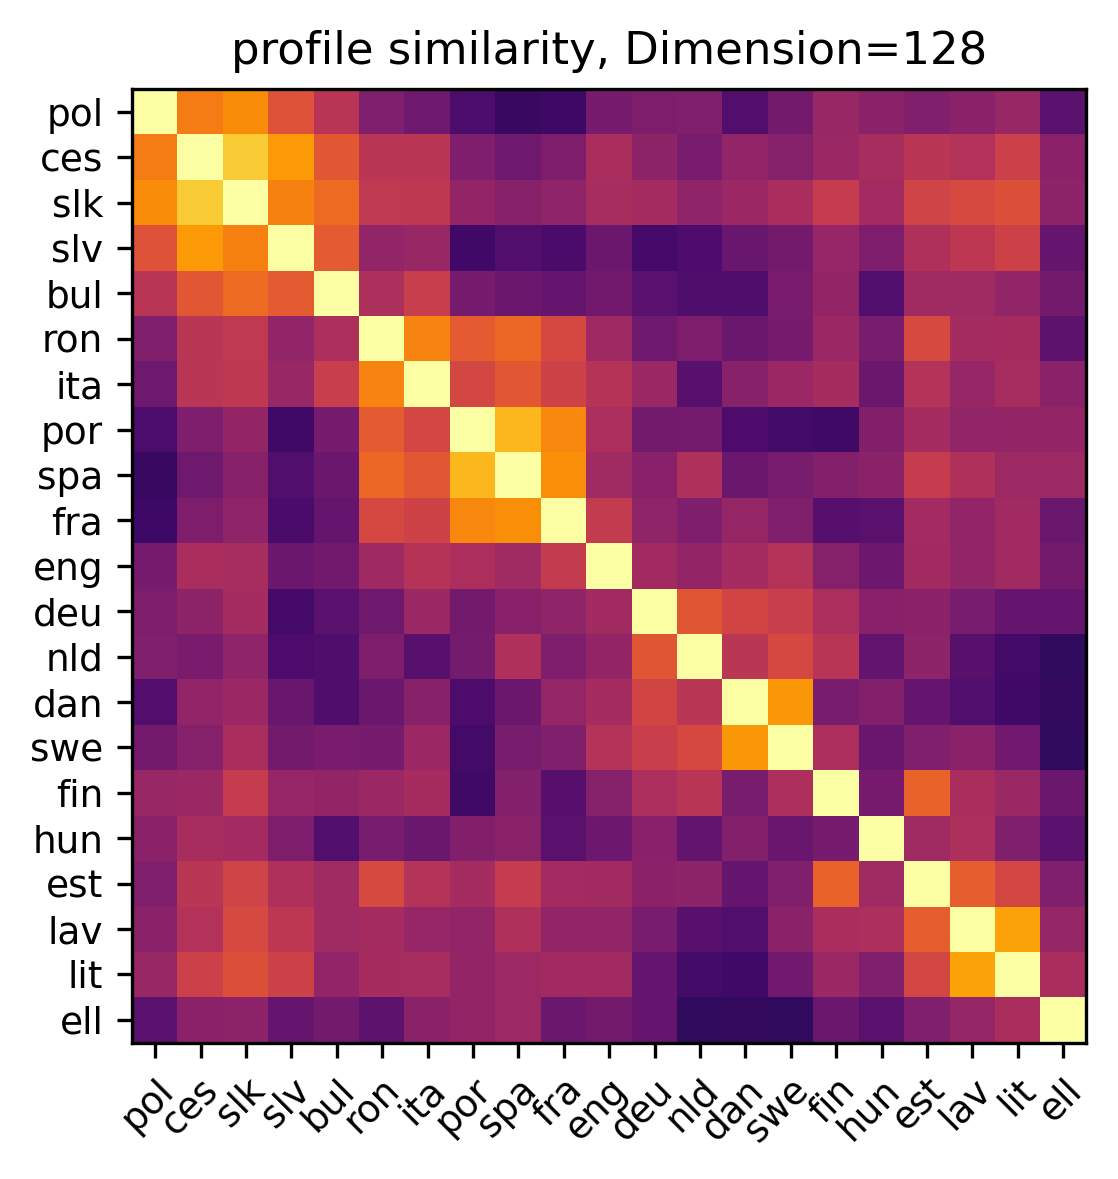

In [169]:
n=3
dataSizeLimit=30000
for dimension in [64, 128]:
    Q3Dic, Q3Profile = makeDicAndProfiles(dimension, langLabels)
    Q3Profile = populateProfiles(Q3Dic, Q3Profile, langLabels, dimension, n, dataSizeLimit)
    q3_cos_sim = getCosSim(Q3Profile, langLabels, langFull)
    visualizeCosSim(q3_cos_sim, langLabels, f"profile similarity, Dimension={dimension}")

We can observe that 1024 dimensions is esufficient to visualize the similarity betwen languages' n-gram statistics. However, when the dimensionality is reduces significantly, such as to $d=64$ or $d=128$, the vectors are unable to represent the profile vectors correctly and the similarity between profile vectors cannot be visualized clearly.